In [9]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays

peeling leafs order: [272, 4, 20, 33, 26, 201, 57, 158, 194, 205, 239, 82, 139, 268, 277, 2, 127, 294, 37, 238, 13, 215, 200, 161, 3, 191, 195, 174, 230, 217, 146, 207, 137, 181, 183, 75, 129, 291, 245, 16, 28, 64, 147, 47, 274, 51, 128, 171, 155, 73, 290, 89, 184, 66, 136, 121, 50, 140, 76, 110, 220, 54, 232, 14, 83, 202, 235, 105, 295, 114, 56, 275, 222, 123, 165, 296, 31, 252, 236, 44, 262, 210, 96, 65, 99, 60, 102, 132, 148, 246, 269, 189, 216, 78, 55, 255, 1, 22, 143, 72, 24, 101, 154, 130, 263, 223, 185, 256, 145, 80, 282, 12, 249, 167, 34, 163, 299, 273, 87, 113, 48, 188, 74, 100, 88, 120, 52, 115, 68, 186, 103, 250, 258, 178, 251, 71, 157, 260, 289, 112, 42, 179, 135, 23, 17, 93, 213, 280, 177, 152, 298, 266, 279, 5, 29, 116, 170, 84, 39, 208, 9, 156, 138, 43, 63, 134, 292, 203, 38, 192, 168, 229, 190, 242, 164, 40, 61, 92, 10, 248, 259, 214, 107, 173, 267, 108, 199, 30, 212, 11, 221, 35, 79, 141, 176, 211, 243, 182, 85, 224, 27, 226, 45, 281, 58, 8, 276, 293, 159, 86, 166, 151

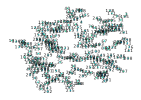

In [10]:
# graph generation
q = 0;
n = 300;
eta = 0.5;
p = 0.9;

rng = Random.default_rng();
comp_graph = gen_graph_ero(rng, n, p, eta);

# sample a CRSF
crsf = multi_type_spanning_forest(rng, comp_graph, q)

# get the nodes in the cycle(s)
cycles = get_prop(crsf,:cycle_nodes)
# get the branches in the (reverse) order there were sampled
branches = get_prop(crsf,:branches)

flt_branches = collect(Iterators.flatten(branches))
flt_cycles = collect(Iterators.flatten(cycles))

print("peeling leafs order: ", flt_branches, "\n")
print("cycle nodes: ",flt_cycles)

# plotting
nodelabel = 1:nv(crsf)
gplot(crsf, nodelabel=nodelabel)

In [11]:
# indices array putting the nodes in the right order
ind = [flt_branches; setdiff(1:n,flt_branches)];
# construct Laplacian
B = sp_magnetic_incidence(crsf; oriented=true);
L = B*B';
# reorder Laplacian
L_perm = L[ind,ind];
# find cholesky
lower_factor = cholesky(L, perm = ind).L;

chol_matrix = sparse(lower_factor)
# number of diag entries
print("choleski of L with custom perm: ", nnz(chol_matrix) - n, " off diagonal entries \n")

# upper bound on number of non-zero entries (Prop 2 in paper)
# n + sum_{cycle c}(n_c - 3)
bound = 0;
for i=1:length(flt_cycles)
    bound += length(flt_cycles[i]) - 3
end
bound  += n;
print("theoretical upper bound: ", bound, " off diagonal entries \n")
#print(sparse(lower_factor))

# cholesky of random permuted Laplacian
p = randperm(n);
lower_factor_rand_perm = sparse(cholesky(L, perm = p).L);
print("choleski of L with RANDOM permutation: ", nnz(lower_factor_rand_perm) - n, " off diagonal entries \n")
#print(lower_factor_rand_perm)

# cholesky of raw Laplacian
lower_factor_raw = sparse(cholesky(L).L);
print("choleski of L with AUTOMATIC permutation: ", nnz(lower_factor_raw) - n, " off diagonal entries \n")


choleski of L with custom perm: 313 off diagonal entries 
theoretical upper bound: 

262 off diagonal entries 
choleski of L with RANDOM permutation: 1047 off diagonal entries 
choleski of L with AUTOMATIC permutation: 313 off diagonal entries 
